# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Data Transformations: Normalization and Log

We will cover two very common transformations:

    1) Normalization (also referred to as a min-max scaler):
    2) Log transformation: This helps make the data "less skewed"
    
    
More about transformations [here](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16#:~:text=Skewed%20data%20is%20cumbersome%20and,Root%20and%20the%20Hyperbolic%20Tangent.).

In [7]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [9]:
data['Creadit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Creadit_Limitd_Transformed'] = np.log(data['Credit_Limit'])

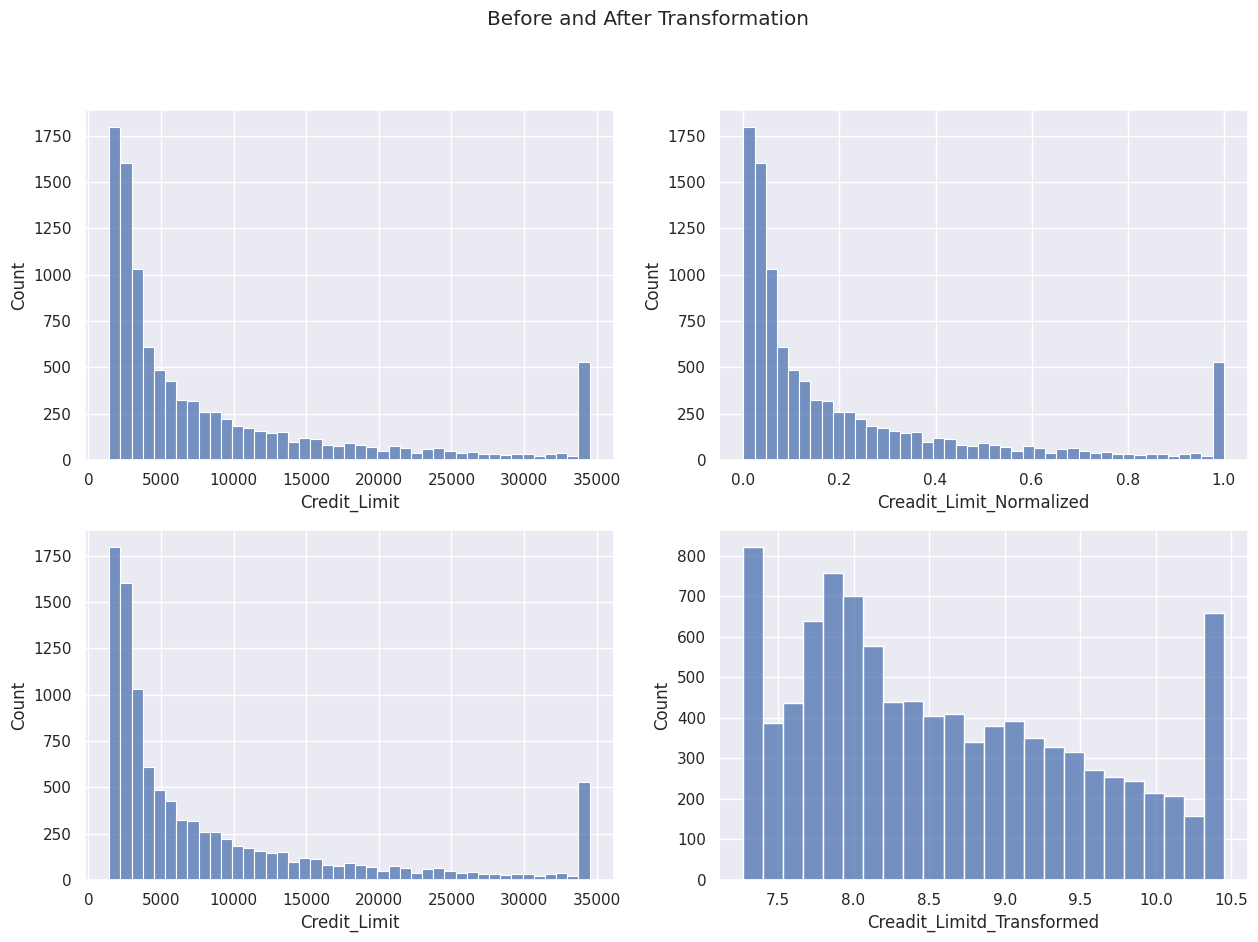

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Before and After Transformation')

#create boxplot in each subplot
sns.histplot(data, x="Credit_Limit", ax=axes[0,0])
sns.histplot(data, x="Creadit_Limit_Normalized", ax=axes[0,1])
sns.histplot(data, x="Credit_Limit", ax=axes[1,0])
sns.histplot(data, x="Creadit_Limitd_Transformed", ax=axes[1,1]);